## See SVM's separating hyperplane for 1D, 2D, and 3D data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from io import StringIO # to treat a string as a file
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### Start with 1D toy data:

In [2]:
data_string = """
x1,  y
 0, -1
 1, -1
 3,  1
 4,  1
"""
# Note: I will describe pd.read_csv(), pd.DataFrame(), and the '[]' and
# '[[]]' and '.' notation (below) in my Python lecture '05pandas',
# coming soon. I will describe plt.plot() and the related graphics calls
# in my '06matplotlib' lecture, coming soon.
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python') # sep is '[optional whitespace][comma][whitespace]'
X = df[['x1']] # a 2D DataFrame with one column; clf.predict(), below, wants 2D X
y = df.y
print(f'X={X}, X.shape={X.shape},\ny={y}, y.shape={y.shape}')

X=   x1
0   0
1   1
2   3
3   4, X.shape=(4, 1),
y=0   -1
1   -1
2    1
3    1
Name: y, dtype: int64, y.shape=(4,)


In [3]:
clf = svm.SVC(kernel="linear", C=1000) # 'SVC' = 'support vector classification'
clf.fit(X, y) # X is 2D
print(f'clf.coef_={clf.coef_}')
print(f'clf.intercept_={clf.intercept_}')

clf.coef_=[[1.]]
clf.intercept_=[-2.]


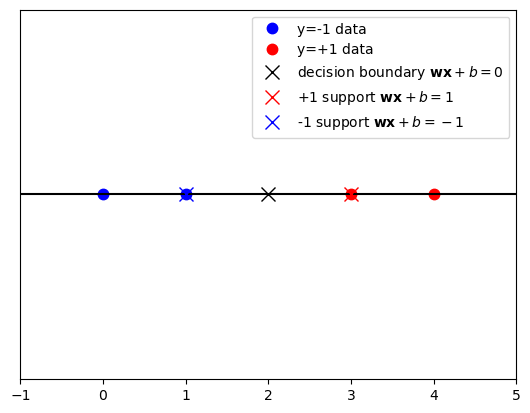

In [4]:
x_plot = df.x1[df.y == -1]
plt.plot(x_plot, np.zeros(shape=x_plot.shape), marker='.', markersize=15, color='blue', linestyle='', label='y=-1 data')
x_plot = df.x1[df.y == 1]
plt.plot(x_plot, np.zeros(shape=x_plot.shape), marker='.', markersize=15, color='red', linestyle='', label='y=+1 data')
plt.xlim(-1, 5)
plt.axhline(y=0, c='k')
ax = plt.gca()
ax.axes.get_yaxis().set_visible(False) # remove y-axis
# The boundary is given by wx + b = 0 => x = -b / w.
boundary = -clf.intercept_[0] / clf.coef_[0]
plt.plot(boundary,     0, marker='x', markersize=10, color='black', linestyle='', label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(boundary + 1, 0, marker='x', markersize=10, color='red', linestyle='', label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(boundary - 1, 0, marker='x', markersize=10, color='blue', linestyle='', label=r'-1 support $\mathbf{wx} + b = -1$')
_ = plt.legend()


In [5]:
# make a few predictions
X_new = pd.DataFrame({'x1': [0, 1.5, 2, 2.5, 4]})
clf.predict(X_new)

array([-1, -1,  1,  1,  1], dtype=int64)

### Now try 2D toy data:

In [6]:
data_string = """
x1, x2,  y
 0,  0, -1
-1,  1, -1
 1, -1, -1
 0,  1,  1
 1,  1,  1
 1,  0,  1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
df # a data frame is like a spreadsheet

,x1,x2,y
0,0,0,-1
1,-1,1,-1
2,1,-1,-1
3,0,1,1
4,1,1,1
5,1,0,1


In [7]:
X = df[['x1', 'x2']]
y = df.y
print(f'X={X}, X.shape={X.shape},\ny={y}, y.shape={y.shape}')

X=   x1  x2
0   0   0
1  -1   1
2   1  -1
3   0   1
4   1   1
5   1   0, X.shape=(6, 2),
y=0   -1
1   -1
2   -1
3    1
4    1
5    1
Name: y, dtype: int64, y.shape=(6,)


In [8]:
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)
print(f'clf.coef_={clf.coef_}')
print(f'clf.intercept_={clf.intercept_}')

clf.coef_=[[2. 2.]]
clf.intercept_=[-1.]


The decision boundary is defined by $\mathbf{wx} + b = 0$. To
plot it in the 2D $\mathbf{x}$ case, we use $x$-coordinate $x_1$ and $y$-coordinate
$x_2$. Let's solve for the $y$-coordinate $x_2$: $\mathbf{wx} + b = 0$
$\implies w_1 x_1 + w_2 x_2 + b = 0 \implies x_2 = -\frac{w_1 x_1 + b}{w_2}$.

Now, in Python $\mathbf{w}$ is given by `clf.coef_[0]` and $b$ is given by `clf.intercept_`, so the boundary is

`x2 = -(clf.coef_[0][0] * x1 + clf.intercept_) / clf.coef_[0][1]`.

The constraints are $\mathbf{wx} + b \ge 1$ if $y = +1$ and $\mathbf{wx} + b \le -1$ if $y = -1$; use $=$ instead of $\ge$ or $\le$ to get the margin edges.

With these formulas in mind, let's plot the data, decision boundary, and margin edges.

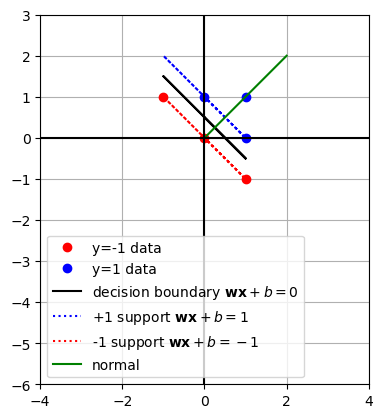

In [9]:
# Plot the data:
# First plot the y == -1 values red with x coordinate from the x1 column of X
# and y coordinate from the x2 column of X.
plt.plot(df.x1[y == -1], df.x2[y == -1], '.', markersize=12, color='red', label='y=-1 data')
# Second plot the y == 1 values blue.
plt.plot(df.x1[y ==  1], df.x2[y ==  1], '.', markersize=12, color='blue', label='y=1 data')
plt.axis('square')
plt.grid()
plt.xlim(-4, 4)
plt.ylim(-6, 3)

# add the decision boundary and margin boundaries
x1 = df.x1
x2 = -(clf.coef_[0][0] * x1 + clf.intercept_) / clf.coef_[0][1]
plt.plot(x1, x2, color='black', label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(x1, x2 + 1 / clf.coef_[0][1], linestyle=':', color='blue',label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(x1, x2 - 1 / clf.coef_[0][1], linestyle=':', color='red', label=r'-1 support $\mathbf{wx} + b = -1$')
plt.plot([0, clf.coef_[0][0]], [0, clf.coef_[0][1]], color='green', label=r'normal') # arguments are [x1, x2], [y1, y2]
plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')
_ = plt.legend()


In [10]:
# make a couple of predictions
X_new = pd.DataFrame({'x1': [2, -2], 'x2': [2, -2]})
print(f'clf.predict({X_new})={clf.predict(X_new)}')

clf.predict(   x1  x2
0   2   2
1  -2  -2)=[ 1 -1]


### Now let's try 3D data:
(modified from [Support Vector Machines (SVM) clearly explained](https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8); data described at [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset), which says "One class is linearly separable from the other 2; the latter are NOT linearly separable from each other," and [sklearn.datasets.load_iris¶](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html))

In [11]:
iris = datasets.load_iris()
# inspect the data:
print(f'iris.feature_names={iris.feature_names}')
print(f'first few rows:\n{iris.data[0:3, :]}')
print(f'first few target values: {iris.target[0:3]} (there are 0, 1, and 2 values)')

iris.feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
first few rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
first few target values: [0 0 0] (there are 0, 1, and 2 values)


In [12]:
X = iris.data[:, :3]  # we only take the first three features (columns) for 3D visualization
Y = iris.target
# make it a binary classification problem by excluding the Y==2 examples
X = X[np.logical_or(Y==0, Y==1)]
Y = Y[np.logical_or(Y==0, Y==1)]
print(f'X=\n{X[0:3]}...,\nY={Y[0:3]}...')

X=
[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]]...,
Y=[0 0 0]...


In [13]:
model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)
print(f'clf.coef_={clf.coef_}')
print(f'clf.intercept_={clf.intercept_}')

clf.coef_=[[ 0.30488777 -0.71125336  1.15277433]]
clf.intercept_=[-2.23510531]


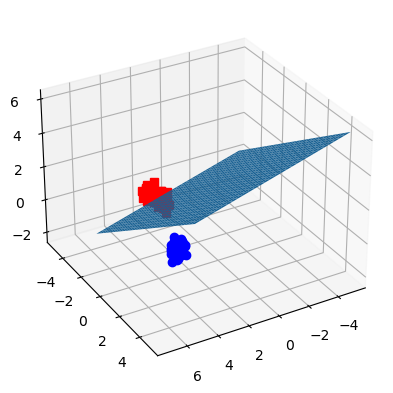

In [14]:
# plot the data
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')

# The equation of the separating plane is given by all x so that
# np.dot(svc.coef_[0], x) + b = 0. Solve for x_3, the third coordinate in
# (x_1, x_2, x_3) or, in plotting notation, (x, y, z).)
def z(x, y): # define a function that gives z from x and y based on the model
    return((-clf.intercept_[0] - clf.coef_[0][0]*x - clf.coef_[0][1]*y) /
           clf.coef_[0][2])
linspace = np.linspace(start=-5, stop=5, num=30) # 30 values between -5 and 5
x,y = np.meshgrid(linspace, linspace) # make 2D coordinate array from two 1D vectors

# https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#surface-plots
ax.plot_surface(X=x, Y=y, Z=z(x,y))
_ = ax.view_init(30, 60)


In [15]:
z(x, y)

array([[ 1.76337523e-01,  8.51369190e-02, -6.06368501e-03,
        -9.72642891e-02, -1.88464893e-01, -2.79665497e-01,
        -3.70866101e-01, -4.62066705e-01, -5.53267309e-01,
        -6.44467913e-01, -7.35668517e-01, -8.26869121e-01,
        -9.18069725e-01, -1.00927033e+00, -1.10047093e+00,
        -1.19167154e+00, -1.28287214e+00, -1.37407275e+00,
        -1.46527335e+00, -1.55647395e+00, -1.64767456e+00,
        -1.73887516e+00, -1.83007577e+00, -1.92127637e+00,
        -2.01247697e+00, -2.10367758e+00, -2.19487818e+00,
        -2.28607879e+00, -2.37727939e+00, -2.46847999e+00],
       [ 3.89093631e-01,  2.97893027e-01,  2.06692423e-01,
         1.15491819e-01,  2.42912150e-02, -6.69093891e-02,
        -1.58109993e-01, -2.49310597e-01, -3.40511201e-01,
        -4.31711805e-01, -5.22912409e-01, -6.14113013e-01,
        -7.05313617e-01, -7.96514221e-01, -8.87714825e-01,
        -9.78915429e-01, -1.07011603e+00, -1.16131664e+00,
        -1.25251724e+00, -1.34371785e+00, -1.43491845e+